Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.58       216
           1       0.93      0.97      0.95      1486

    accuracy                           0.91      1702
   macro avg       0.82      0.73      0.77      1702
weighted avg       0.90      0.91      0.90      1702

Confusion Matrix:
[[ 107  109]
 [  43 1443]]
Accuracy Score: 0.9106933019976499


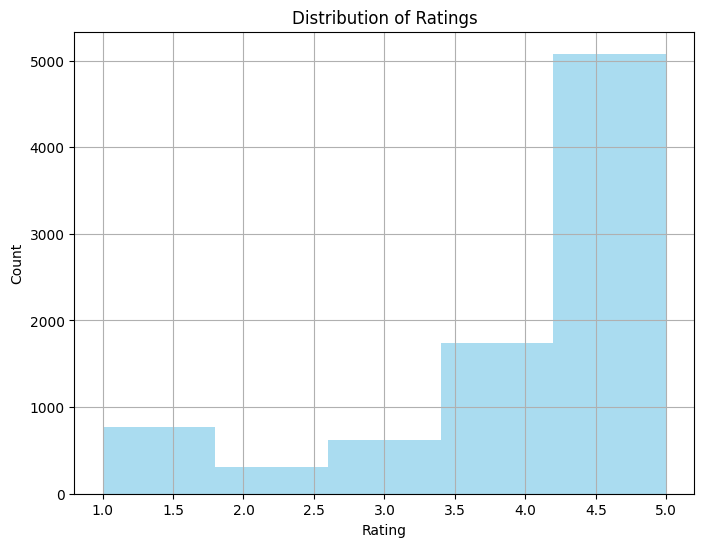

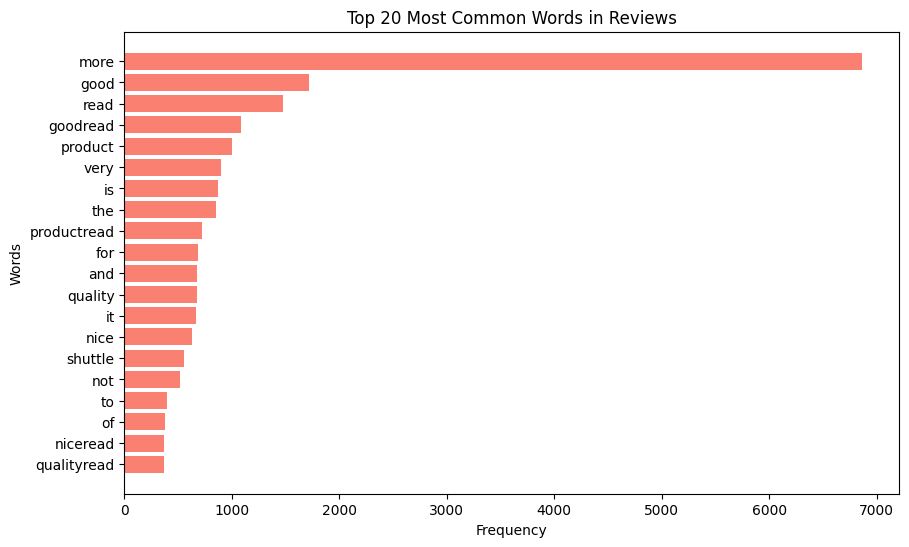

['vocabulary.pkl']

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import joblib

data = pd.read_csv("./reviews_badminton/data.csv")

data.dropna(subset=['Review text', 'Ratings'], inplace=True)

data['Sentiment'] = data['Ratings'].apply(lambda x: 1 if x >= 3 else 0)

X_train, X_test, y_train, y_test = train_test_split(data['Review text'], data['Sentiment'], test_size=0.2, random_state=42)

cv = CountVectorizer(max_features=100)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

model = LogisticRegression()
model.fit(X_train_cv, y_train)

y_pred = model.predict(X_test_cv)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
data['Ratings'].hist(bins=5, color='skyblue', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

feature_names = cv.get_feature_names_out()
word_freq = dict(zip(feature_names, X_train_cv.sum(axis=0).tolist()[0]))
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]

plt.figure(figsize=(10, 6))
plt.barh([word[0] for word in sorted_word_freq], [word[1] for word in sorted_word_freq], color='salmon')
plt.title('Top 20 Most Common Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()
joblib.dump(model, "model.h5")
joblib.dump(cv.vocabulary_, "vocabulary.pkl")